# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import scanpy as sc

from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

/home/icb/amirali.moinfar/miniconda3/envs/drvi_repr/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/icb/amirali.moinfar/miniconda3/envs/drvi_repr/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/icb/amirali.moinfar/miniconda3/envs/drvi_repr/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/icb/amirali.moinfar/miniconda3/envs/drvi_repr/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/home/icb/amirali.moinfar/miniconda3/e

In [3]:
import warnings
# warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')

In [4]:
import os
import pickle

import scanpy as sc
import pandas as pd
from pathlib import Path
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from drvi_notebooks.utils.method_info import pretify_method_name

# Config

In [6]:
cwd = os.getcwd()
cwd

'/ictstr01/home/icb/amirali.moinfar/projects/drvi_reproducibility_public/drvi_notebooks/evaluation'

In [7]:
proj_dir = Path(cwd).parent.parent
proj_dir

PosixPath('/ictstr01/home/icb/amirali.moinfar/projects/drvi_reproducibility_public')

In [8]:
logs_dir = Path(os.path.expanduser('~/workspace/train_logs'))
logs_dir

PosixPath('/home/icb/amirali.moinfar/workspace/train_logs')

In [9]:
import mplscience
mplscience.available_styles()
mplscience.set_style()

['default', 'despine']


In [10]:
cat_10_pallete = sc.plotting.palettes.vega_10_scanpy
cat_20_pallete = sc.plotting.palettes.vega_20_scanpy
wong_pallete = [
    "#0072B2", "#F0E442", "#009E73", "#D55E00", "#CC79A7", "#56B4E9", "#E69F00", "#000000",
]
cat_100_pallete = sc.plotting.palettes.godsnot_102

## Runs to load

In [11]:
datasets = OrderedDict([
    ('pancreas_scvelo', dict(
        name='Developmental\npancreas',
    )),
    ('hlca', dict(
        name='Human lung\ncell atlas',
    )),
    ('norman_hvg', dict(
        # name='Norman\nPerturb-seq',
        name='CRISPR screen\n',
    )),
    ('retina_organoid_hvg', dict(
        name='Retina organoid\n',
    )),
    ('immune_hvg', dict(
        name='Immune\n',
    )),
    ('pbmc_covid_hvg', dict(
        name='PBMC\n',
    )),
    ('zebrafish_hvg', dict(
        # name='Zebrafish\n',
        name='Daniocell\n',
    )),
])
datasets

OrderedDict([('pancreas_scvelo', {'name': 'Developmental\npancreas'}),
             ('hlca', {'name': 'Human lung\ncell atlas'}),
             ('norman_hvg', {'name': 'CRISPR screen\n'}),
             ('retina_organoid_hvg', {'name': 'Retina organoid\n'}),
             ('immune_hvg', {'name': 'Immune\n'}),
             ('pbmc_covid_hvg', {'name': 'PBMC\n'}),
             ('zebrafish_hvg', {'name': 'Daniocell\n'})])

In [12]:
results_collection = {}
results_df = []
for ds_name, ds_info in datasets.items():
    metric_results_pkl_address = proj_dir / 'results' / f'eval_disentanglement_fine_metric_results_{ds_name}_no_noise.pkl'
    if os.path.exists(metric_results_pkl_address):
        with open(metric_results_pkl_address, 'rb') as f:
            results_collection[ds_name] = pickle.load(f)
        tmp_df = pd.read_csv(proj_dir / 'results' / f'eval_disentanglement_{ds_name}_LMS.csv', index_col=0).T.reset_index(names='method')
        tmp_df['dataset_id'] = ds_name
        tmp_df['dataset'] = ds_info['name']
        tmp_df['metric_type'] = 'LMS'
        tmp_df = pd.melt(tmp_df, id_vars=['dataset_id', 'dataset', 'method', 'metric_type'])
        results_df.append(tmp_df)
        tmp_df = pd.read_csv(proj_dir / 'results' / f'eval_disentanglement_{ds_name}_MSAS.csv', index_col=0).T.reset_index(names='method')
        tmp_df['dataset_id'] = ds_name
        tmp_df['dataset'] = ds_info['name']
        tmp_df['metric_type'] = 'MSAS'
        tmp_df = pd.melt(tmp_df, id_vars=['dataset_id', 'dataset', 'method', 'metric_type'])
        results_df.append(tmp_df)
        tmp_df = pd.read_csv(proj_dir / 'results' / f'eval_disentanglement_{ds_name}_MSGS.csv', index_col=0).T.reset_index(names='method')
        tmp_df['dataset_id'] = ds_name
        tmp_df['dataset'] = ds_info['name']
        tmp_df['metric_type'] = 'MSGS'
        tmp_df = pd.melt(tmp_df, id_vars=['dataset_id', 'dataset', 'method', 'metric_type'])
        results_df.append(tmp_df)
results_df = pd.concat(results_df).reset_index(drop=True)
results_df['metric_short_name'] = results_df['metric'].map({
    'Absolute Spearman Correlation': 'ASC',
    'Mutual Info Score': 'SMI',
    'NN Alignment': 'SPN',
})
results_df['metric_short_name_complete'] = results_df['metric_type']  + '-' + results_df['metric_short_name']
# Already pretified in disentanglement evaluation notebook
# results_df['method'] = results_df['method'].apply(pretify_method_name)

In [13]:
results_df

,dataset_id,dataset,method,metric_type,metric,value,metric_short_name,metric_short_name_complete
0,pancreas_scvelo,Developmental\npancreas,DRVI,LMS,Absolute Spearman Correlation,0.327525,ASC,LMS-ASC
1,pancreas_scvelo,Developmental\npancreas,DRVI-AP,LMS,Absolute Spearman Correlation,0.289834,ASC,LMS-ASC
2,pancreas_scvelo,Developmental\npancreas,scVI,LMS,Absolute Spearman Correlation,0.259956,ASC,LMS-ASC
3,pancreas_scvelo,Developmental\npancreas,PCA,LMS,Absolute Spearman Correlation,0.292568,ASC,LMS-ASC
4,pancreas_scvelo,Developmental\npancreas,ICA,LMS,Absolute Spearman Correlation,0.269194,ASC,LMS-ASC
...,...,...,...,...,...,...,...,...
562,zebrafish_hvg,Daniocell\n,ICA,MSGS,Mutual Info Score,0.221011,SMI,MSGS-SMI
563,zebrafish_hvg,Daniocell\n,MOFA,MSGS,Mutual Info Score,0.047777,SMI,MSGS-SMI
564,zebrafish_hvg,Daniocell\n,B-TCVAE,MSGS,Mutual Info Score,0.047737,SMI,MSGS-SMI
565,zebrafish_hvg,Daniocell\n,MICHIGAN,MSGS,Mutual Info Score,0.030936,SMI,MSGS-SMI


In [14]:
# Remove TCVAE and MICHIGAN and keep hyper-parameters optimized versions
REMOVE_UNOPTIMIZED = True
if REMOVE_UNOPTIMIZED:
    results_df = results_df[~(results_df['method'].isin(['B-TCVAE default', 'MICHIGAN default']))]
results_df

,dataset_id,dataset,method,metric_type,metric,value,metric_short_name,metric_short_name_complete
0,pancreas_scvelo,Developmental\npancreas,DRVI,LMS,Absolute Spearman Correlation,0.327525,ASC,LMS-ASC
1,pancreas_scvelo,Developmental\npancreas,DRVI-AP,LMS,Absolute Spearman Correlation,0.289834,ASC,LMS-ASC
2,pancreas_scvelo,Developmental\npancreas,scVI,LMS,Absolute Spearman Correlation,0.259956,ASC,LMS-ASC
3,pancreas_scvelo,Developmental\npancreas,PCA,LMS,Absolute Spearman Correlation,0.292568,ASC,LMS-ASC
4,pancreas_scvelo,Developmental\npancreas,ICA,LMS,Absolute Spearman Correlation,0.269194,ASC,LMS-ASC
...,...,...,...,...,...,...,...,...
562,zebrafish_hvg,Daniocell\n,ICA,MSGS,Mutual Info Score,0.221011,SMI,MSGS-SMI
563,zebrafish_hvg,Daniocell\n,MOFA,MSGS,Mutual Info Score,0.047777,SMI,MSGS-SMI
564,zebrafish_hvg,Daniocell\n,B-TCVAE,MSGS,Mutual Info Score,0.047737,SMI,MSGS-SMI
565,zebrafish_hvg,Daniocell\n,MICHIGAN,MSGS,Mutual Info Score,0.030936,SMI,MSGS-SMI


In [15]:
col_order = [datasets[ds_name]['name'] for ds_name in ['pancreas_scvelo', 'zebrafish_hvg', 'norman_hvg', 'retina_organoid_hvg', 'immune_hvg', 'hlca', 'pbmc_covid_hvg']]
col_order

['Developmental\npancreas',
 'Daniocell\n',
 'CRISPR screen\n',
 'Retina organoid\n',
 'Immune\n',
 'Human lung\ncell atlas',
 'PBMC\n']

In [16]:
# method_palette = dict(zip(results_df['method'].astype(str).unique(), wong_pallete))
# method_palette = {
#     'DRVI': '#0072B2',
#     'DRVI-IK': '#F0E442',
#     'scVI': '#009E73',
#     'PCA': '#D55E00',
#     'ICA': '#CC79A7',
#     'MOFA': '#56B4E9',
#     # TODO improve colors
#     # 'TCVAE': '#E69F00',
#     'TCVAE-opt': '#966700',
#     # 'MICHIGAN': '#5cbf00',
#     'MICHIGAN-opt': '#3f8200',
# }
total_plot_method_order=[
    'DRVI', 
    ' ', 
    'DRVI-AP', 
    'scVI', 
    # 'TCVAE', 
    'B-TCVAE', 
    # 'MICHIGAN', 
    'MICHIGAN',
    '  ', 
    'PCA', 
    'ICA', 
    'MOFA',
]
method_palette = dict(zip([x for x in total_plot_method_order if x.strip() != ''], cat_10_pallete))
method_palette

{'DRVI': '#1f77b4',
 'DRVI-AP': '#ff7f0e',
 'scVI': '#279e68',
 'B-TCVAE': '#d62728',
 'MICHIGAN': '#aa40fc',
 'PCA': '#8c564b',
 'ICA': '#e377c2',
 'MOFA': '#7f7f7f'}

metric_short_name_complete   LMS-ASC   LMS-SMI   LMS-SPN
Method                                                  
B-TCVAE                     1.052344  1.027472  0.898780
DRVI                        1.102373  1.462526  2.051143
DRVI-AP                     1.013386  1.129049  1.199558
ICA                         0.923413  1.178501  1.554902
MICHIGAN                    0.651410  0.355947  0.234521
MOFA                        1.033441  1.117641  1.274891
PCA                         1.000000  1.000000  1.000000
scVI                        0.999893  0.999296  0.937638
metric_short_name_complete   LMS-ASC   LMS-SMI   LMS-SPN
Method                                                  
DRVI                        1.047541  1.241005  1.319146


<Figure size 400x200 with 0 Axes>

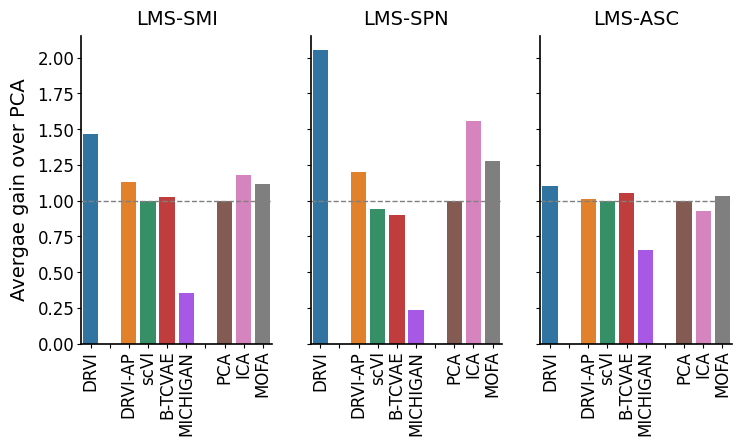

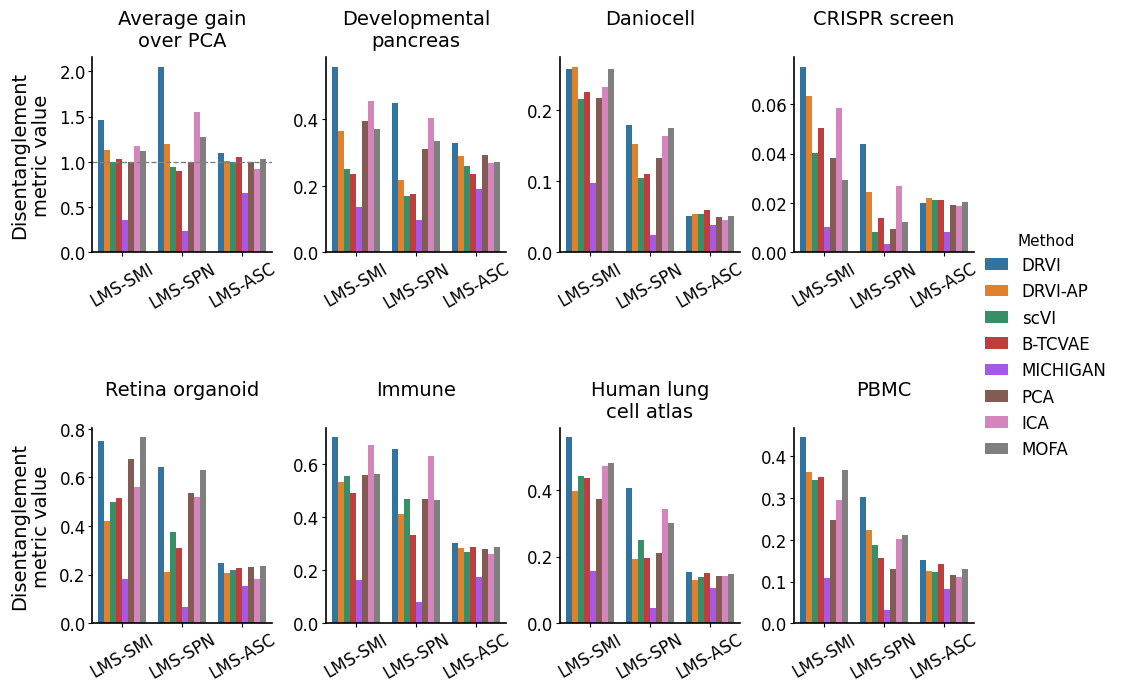

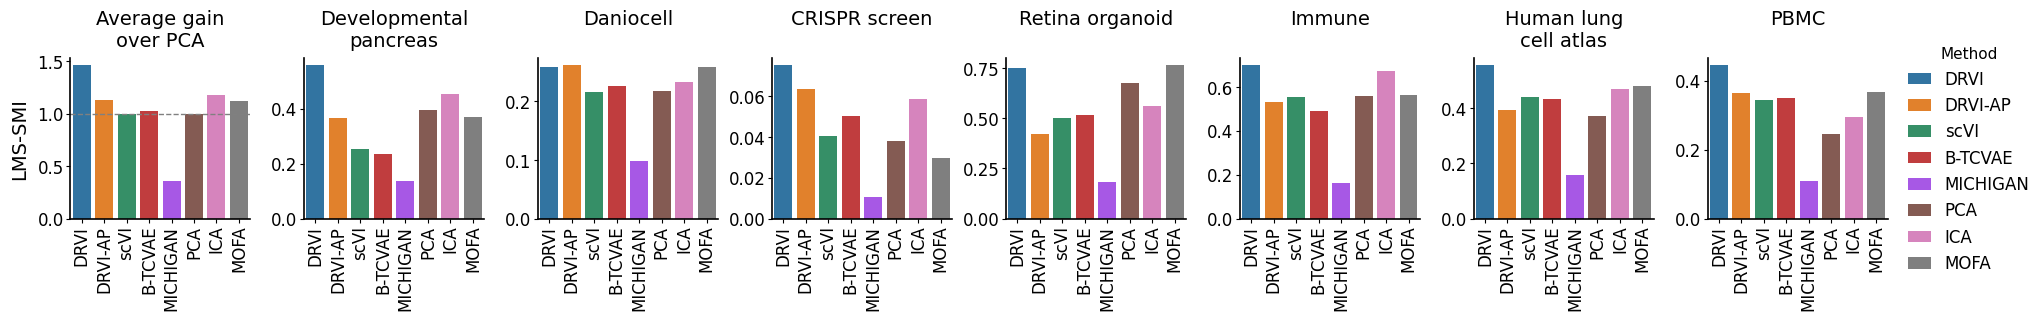

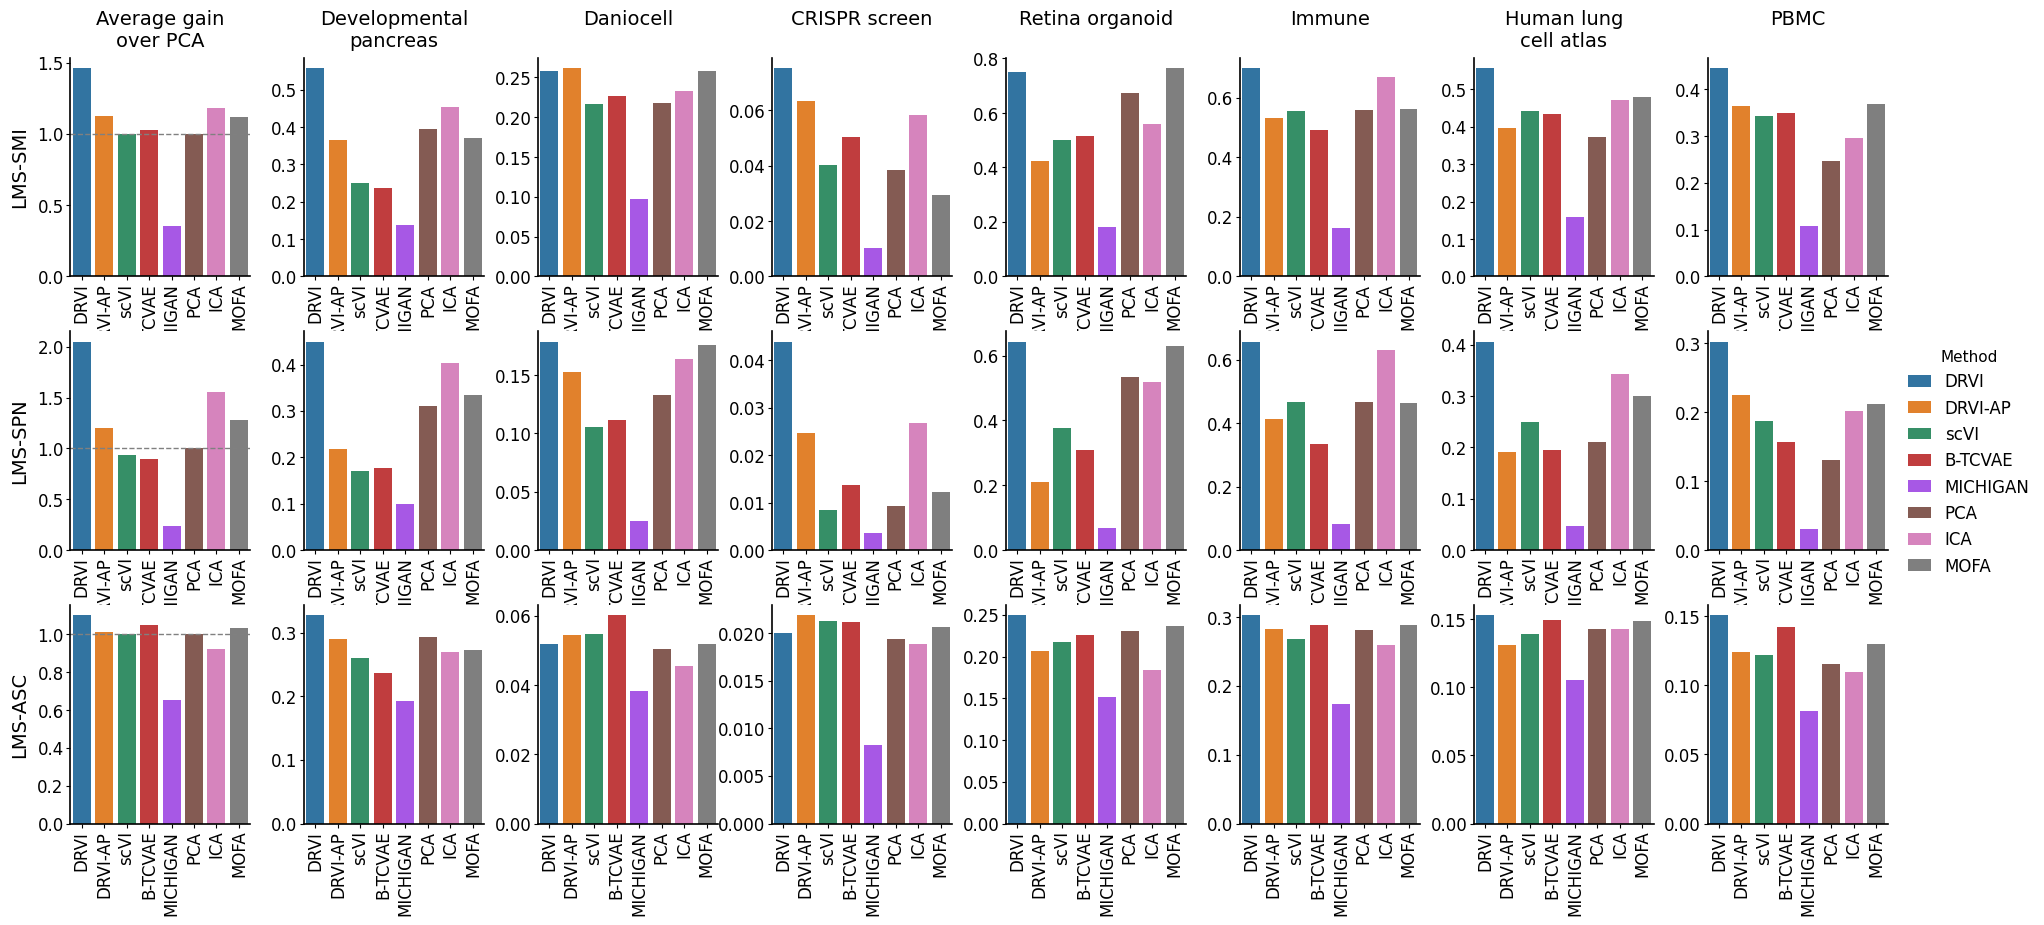

metric_short_name_complete  MSAS-ASC  MSAS-SMI  MSAS-SPN
Method                                                  
B-TCVAE                     0.961543  0.896465  0.813046
DRVI                        1.081309  1.463003  2.113044
DRVI-AP                     0.980570  1.067776  1.138809
ICA                         0.937887  1.208719  1.515974
MICHIGAN                    0.614067  0.304001  0.227345
MOFA                        1.011985  1.084706  1.203982
PCA                         1.000000  1.000000  1.000000
scVI                        1.006160  1.025270  1.011989
metric_short_name_complete  MSAS-ASC  MSAS-SMI  MSAS-SPN
Method                                                  
DRVI                        1.068503  1.210374  1.393853


<Figure size 400x200 with 0 Axes>

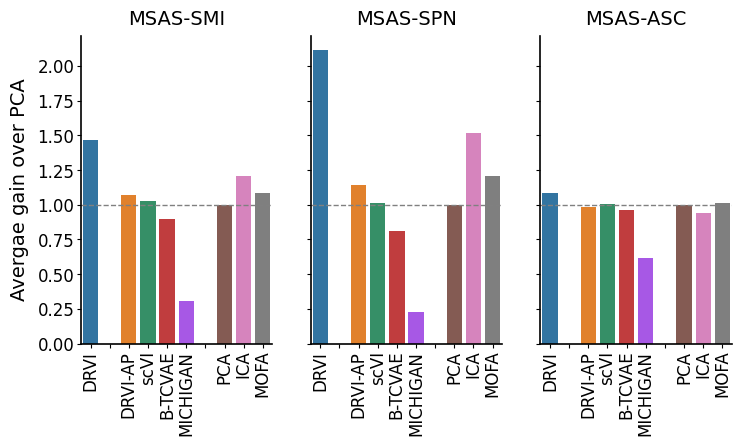

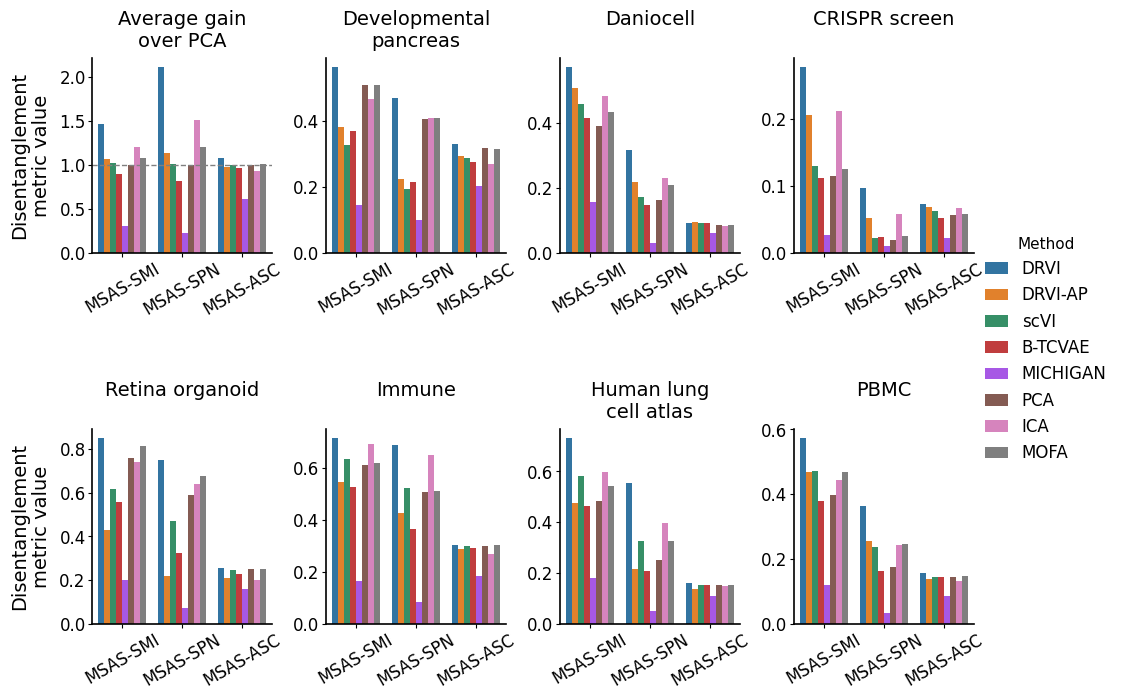

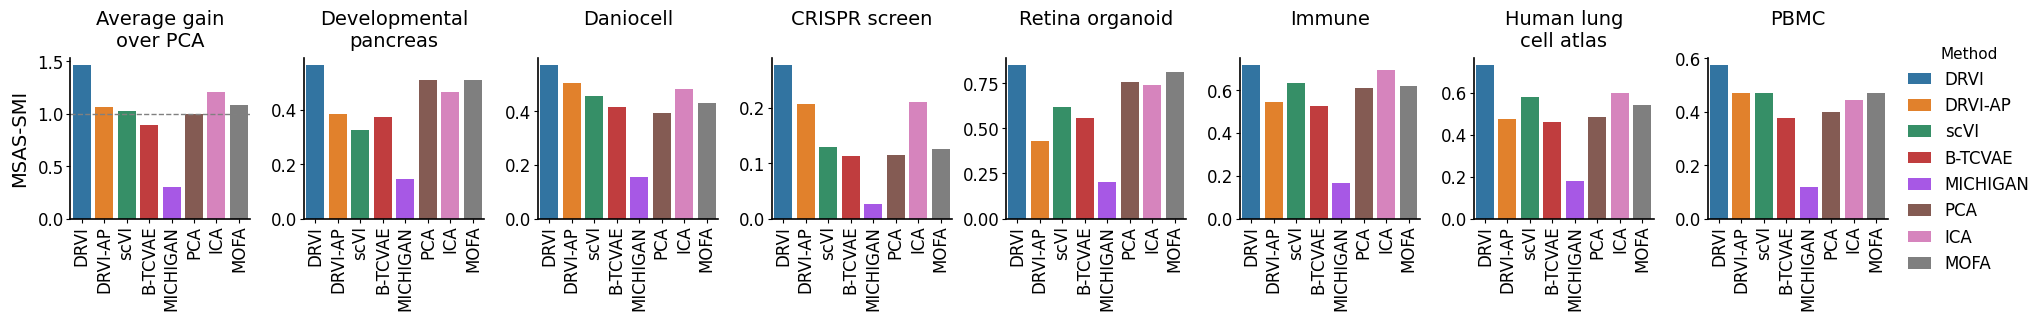

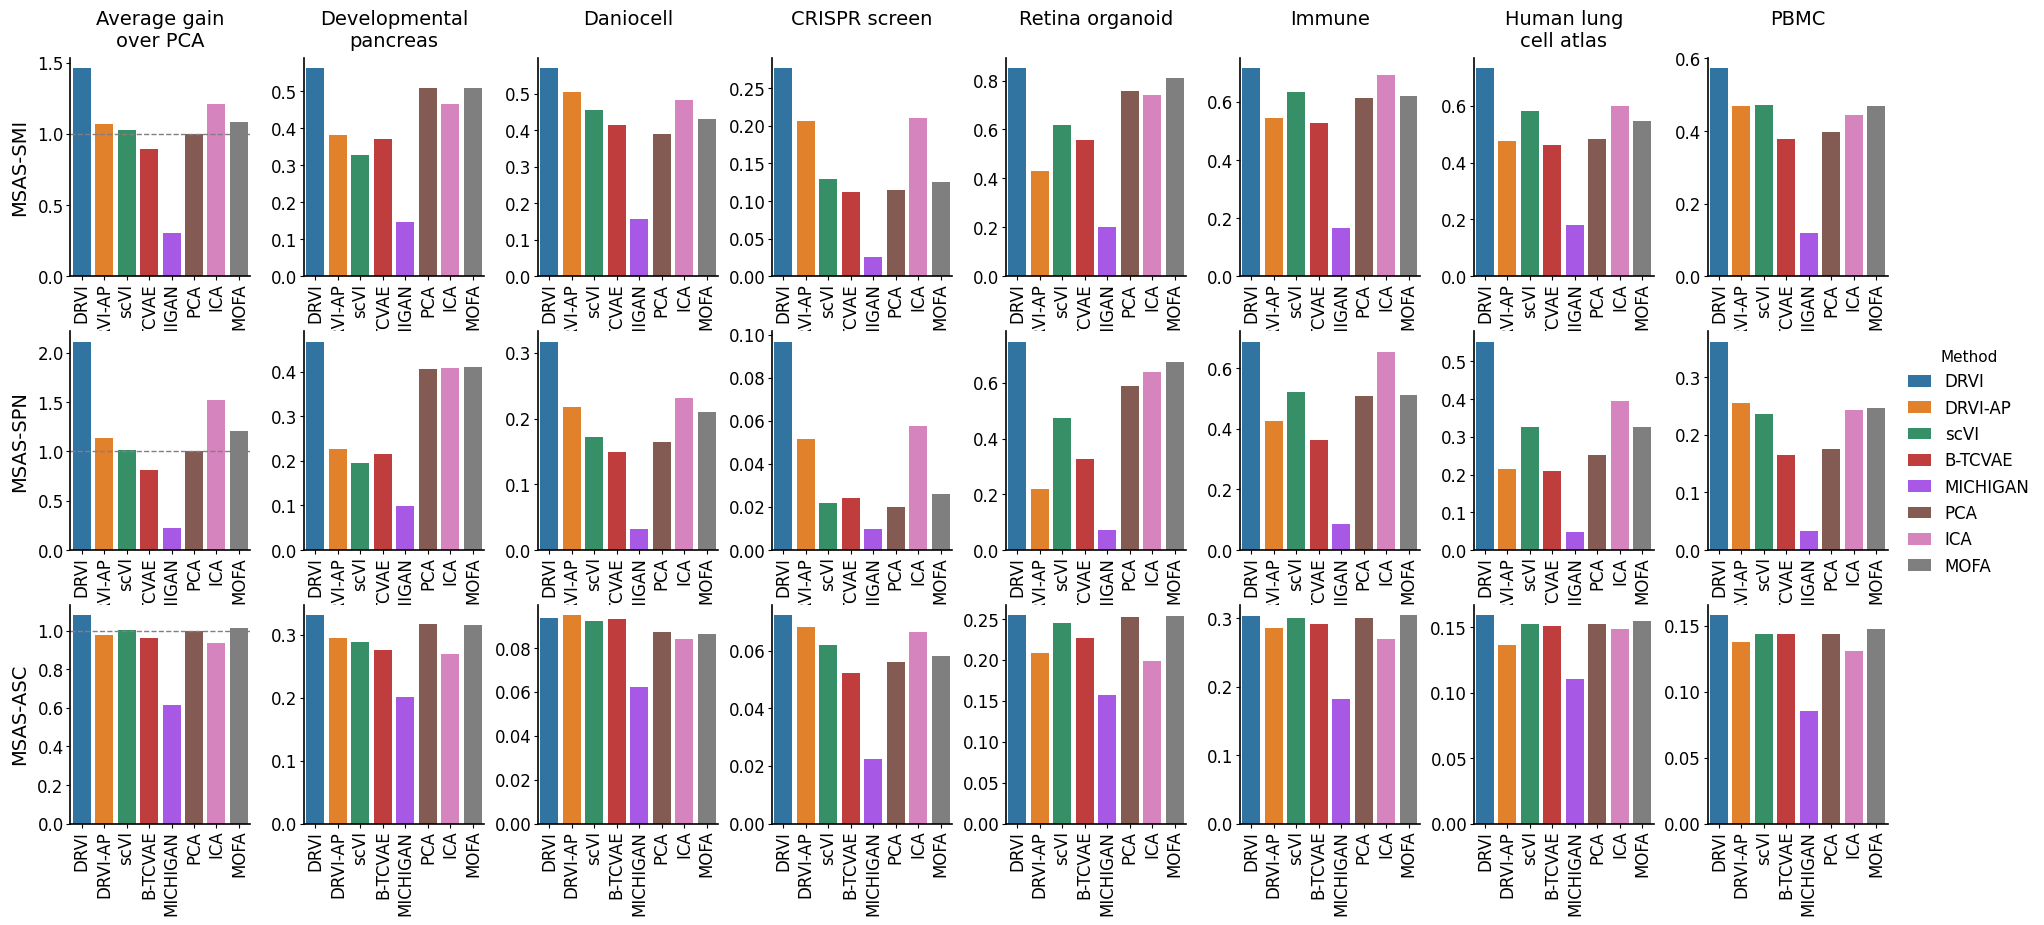

metric_short_name_complete  MSGS-ASC  MSGS-SMI  MSGS-SPN
Method                                                  
B-TCVAE                     0.541354  0.828690  0.817091
DRVI                        1.325338  3.001535  4.415937
DRVI-AP                     0.827965  1.346976  1.618948
ICA                         2.750143  3.353774  3.438776
MICHIGAN                    0.506677  0.360123  0.209392
MOFA                        0.870130  0.925288  1.087152
PCA                         1.000000  1.000000  1.000000
scVI                        1.402170  1.699669  1.741398
metric_short_name_complete  MSGS-ASC  MSGS-SMI  MSGS-SPN
Method                                                  
DRVI                        0.481916  0.894972  1.284159


<Figure size 400x200 with 0 Axes>

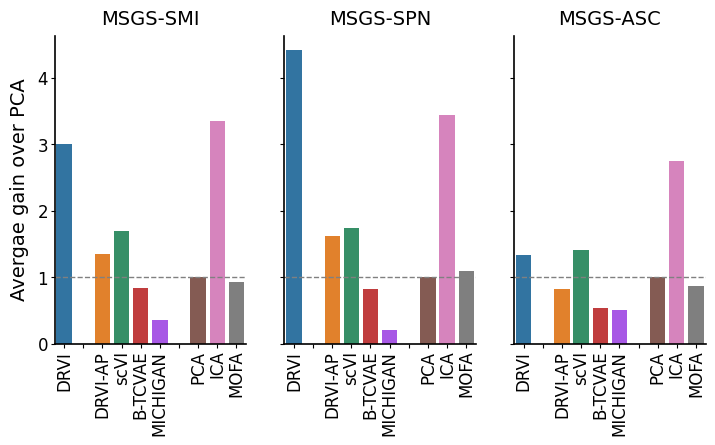

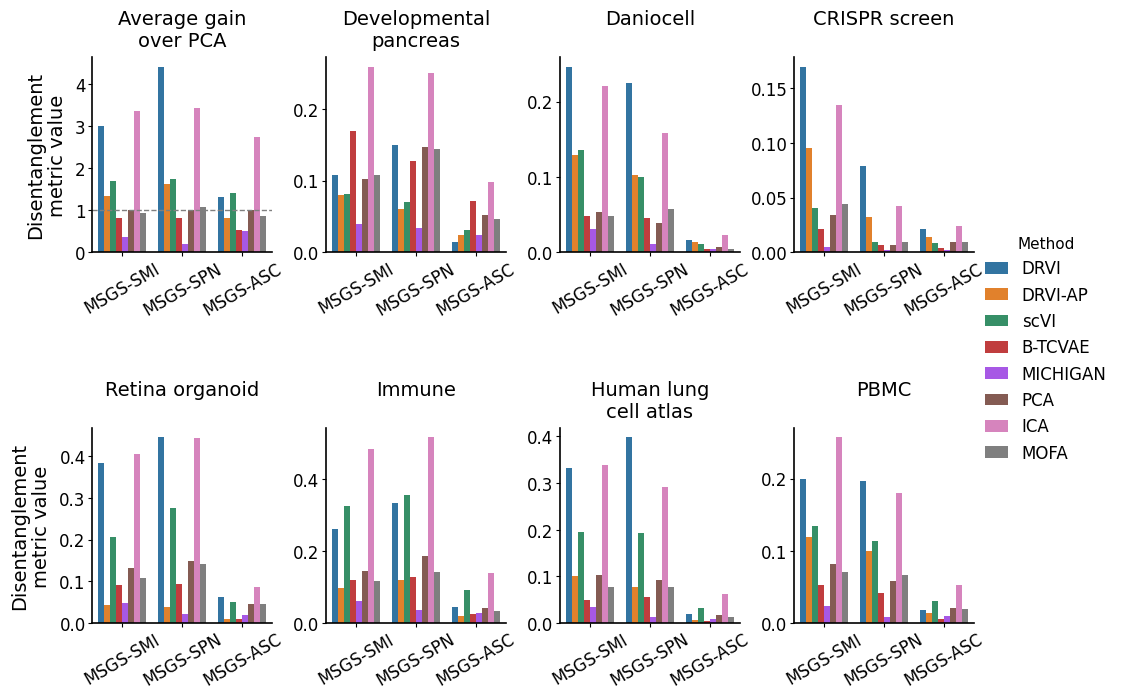

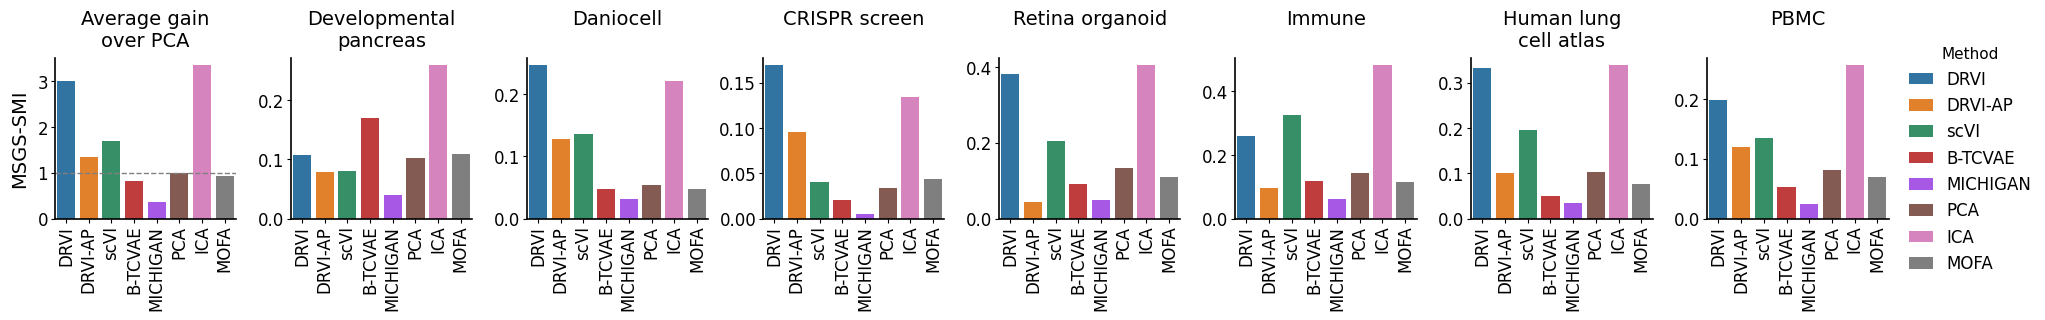

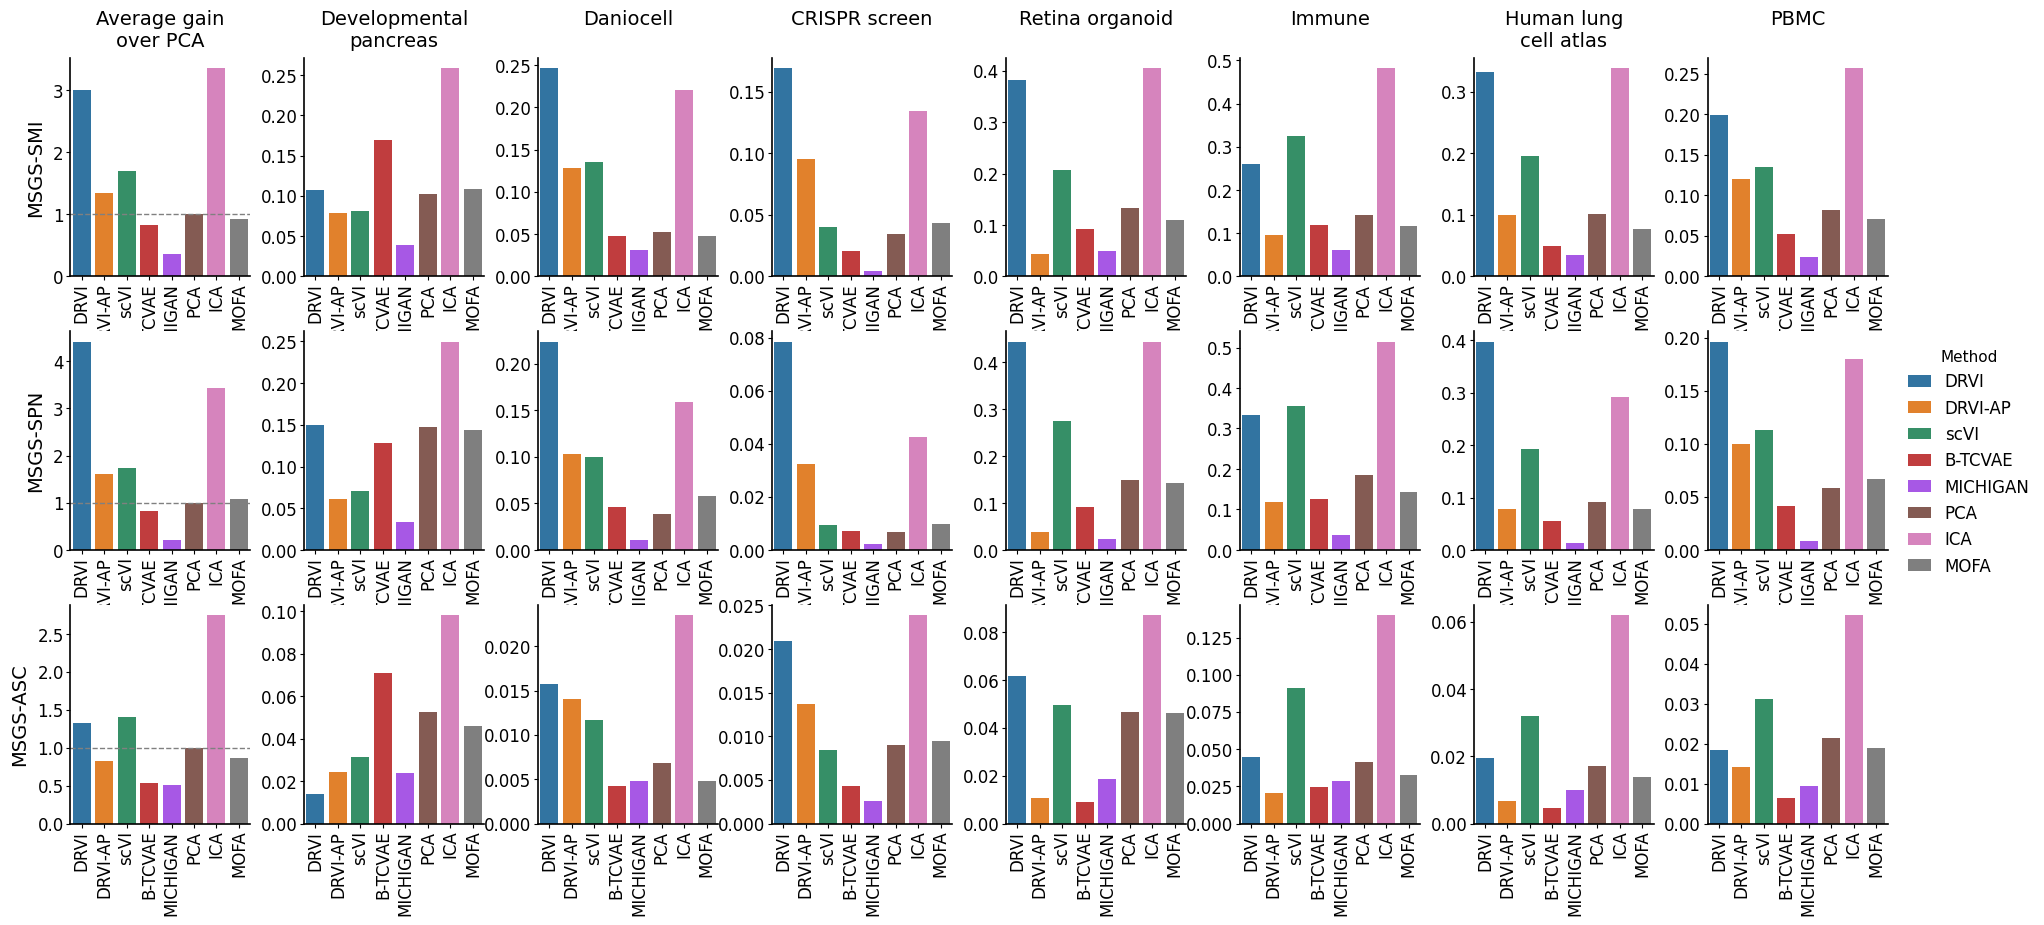

In [17]:
n_cols = 4
total_str = 'Average gain\nover PCA'

for metric_type in ['LMS', 'MSAS', 'MSGS']:
    plot_df = results_df.query(f'metric_type == "{metric_type}"').copy()
    plot_df = plot_df[plot_df['method'].isin(method_palette.keys())]
    plot_df = plot_df.rename(columns={'method': 'Method'})

    # plot_df_2 = plot_df.merge(plot_df.groupby(['metric_short_name_complete', 'dataset']).median('value').rename(columns={'value': 'median_value'}).reset_index(),
    #                           on=['metric_short_name_complete', 'dataset'])
    plot_df_2 = plot_df.merge(plot_df.query('Method == "PCA"')[['metric_short_name_complete', 'dataset', 'value']].rename(columns={'value': 'pca_score'}).reset_index(),
                              on=['metric_short_name_complete', 'dataset'])
    # plot_df_2['normalized_value'] = plot_df_2['value'] / plot_df_2['median_value']
    plot_df_2['value'] = plot_df_2['value'] / plot_df_2['pca_score']
    plot_df_2 = plot_df_2.groupby(['Method', 'metric_short_name_complete']).mean().reset_index()
    plot_df_2['dataset'] = total_str
    summary_df = plot_df_2.pivot(index='Method', columns='metric_short_name_complete', values='value')
    print(summary_df)
    print(summary_df.query('Method == "DRVI"') / summary_df.query('Method != "DRVI"').max())
    # plt.figure(figsize=(4, 8))
    # g = sns.barplot(plot_df_2,
    #                 x="metric_short_name_complete", y="value", order=[f"{metric_type}-ASC", f"{metric_type}-SPN", f"{metric_type}-SMI"],
    #                 hue='Method', hue_order=method_palette.keys(), palette=method_palette,
    #                )
    # # g.set_xticklabels(rotation=30)
    # # g.set_titles(template='{col_name}')
    # g.set(xlabel=None)
    # g.set(ylabel=None)
    # plt.xticks(rotation=30)
    # g.set(ylabel='Avergae gain over PCA')
    # sns.move_legend(g, "upper left", bbox_to_anchor=(1.05, 1.05), title='Method')
    # plt.savefig(proj_dir / "plots" / f"eval_disentanglement_aggregated_{metric_type}_summary.pdf", bbox_inches='tight')
    # plt.show()
    
    plt.figure(figsize=(4, 2))
    g = sns.catplot(
        plot_df_2, kind="bar",
        hue="Method", x="Method", palette=method_palette, order=total_plot_method_order,
        y="value", 
        col="metric_short_name_complete",
        col_order=[f"{metric_type}-SMI", f"{metric_type}-SPN", f"{metric_type}-ASC"],
        height=4, aspect=.7,
        facet_kws={'gridspec_kws': {'wspace': 0.2, 'hspace': 0.4}}
    )
    g.set_titles(template='{col_name}')
    g.set(ylabel='Avergae gain over PCA')
    g.set(xlabel=None)
    g.set_xticklabels(rotation=90)
    for i, ax in enumerate(g.axes.flatten()):
        ax.axhline(y=1., linewidth=1., color='grey', linestyle='--')
    # plt.savefig(proj_dir / "plots" / f"eval_disentanglement_aggregated_{metric_type}_summary_new.pdf", bbox_inches='tight')
    plt.show()

    plot_df = pd.concat([plot_df, plot_df_2]).reset_index(drop=True)
    g = sns.catplot(
        data=plot_df, x="metric_short_name_complete", y="value", col="dataset", hue="Method",
        hue_order=[x for x in total_plot_method_order if x.strip() != ''],
        order=[f"{metric_type}-SMI", f"{metric_type}-SPN", f"{metric_type}-ASC"],
        col_wrap=n_cols, kind="bar", height=3.5, aspect=.7, sharex=False, sharey=False, palette=method_palette,
        col_order=[total_str]+col_order,
    )
    plt.subplots_adjust(hspace=.9, wspace=0.3)
    g.set_xticklabels(rotation=30)
    g.set_titles(template='{col_name}')
    g.set(xlabel=None)
    g.set(ylabel=None)
    for i, ax in enumerate(g.axes):
        if i == 0:
            ax.axhline(y=1., linewidth=1., color='grey', linestyle='--')
        # if i == len(g.axes) - 1:
        #     ax.set(ylabel='Avergae gain over PCA')
        if i % n_cols == 0:
            ax.set(ylabel='Disentanglement\nmetric value')
    g.savefig(proj_dir / "plots" / f"eval_disentanglement_aggregated_{metric_type}.pdf", bbox_inches='tight')
    plt.show()

    for only_smi in [True, False]:
        if only_smi:
            row_order = [f"{metric_type}-SMI"]
        else:
            row_order = [f"{metric_type}-SMI", f"{metric_type}-SPN", f"{metric_type}-ASC"]
        g = sns.catplot(
            data=plot_df, x="Method", y="value", row="metric_short_name_complete", col="dataset", hue="Method",
            hue_order=[x for x in total_plot_method_order if x.strip() != ''],
            order=[x for x in total_plot_method_order if x.strip() != ''],
            row_order=row_order,
            kind="bar", height=3., aspect=.8, sharex=False, sharey=False, palette=method_palette, legend="full",
            col_order=[total_str]+col_order,
        )
        plt.subplots_adjust(hspace=.25, wspace=0.3)
        g.set_xticklabels(rotation=90)
        g.set_titles(template='{col_name}')
        g.set(xlabel=None)
        g.set(ylabel=None)
        for i, axes in enumerate(g.axes):
            for j, ax in enumerate(axes):
                if j == 0:
                    ax.set(ylabel=row_order[i])
                    ax.axhline(y=1., linewidth=1., color='grey', linestyle='--')
                if i != 0:
                    ax.set(title='')
        g.savefig(proj_dir / "plots" / f"eval_disentanglement_aggregated_{metric_type}_new_{'only_smi' if only_smi else ''}.pdf", bbox_inches='tight')
        plt.show()

In [18]:
import matplotlib
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
from plottable.plots import bar, circled_image # image

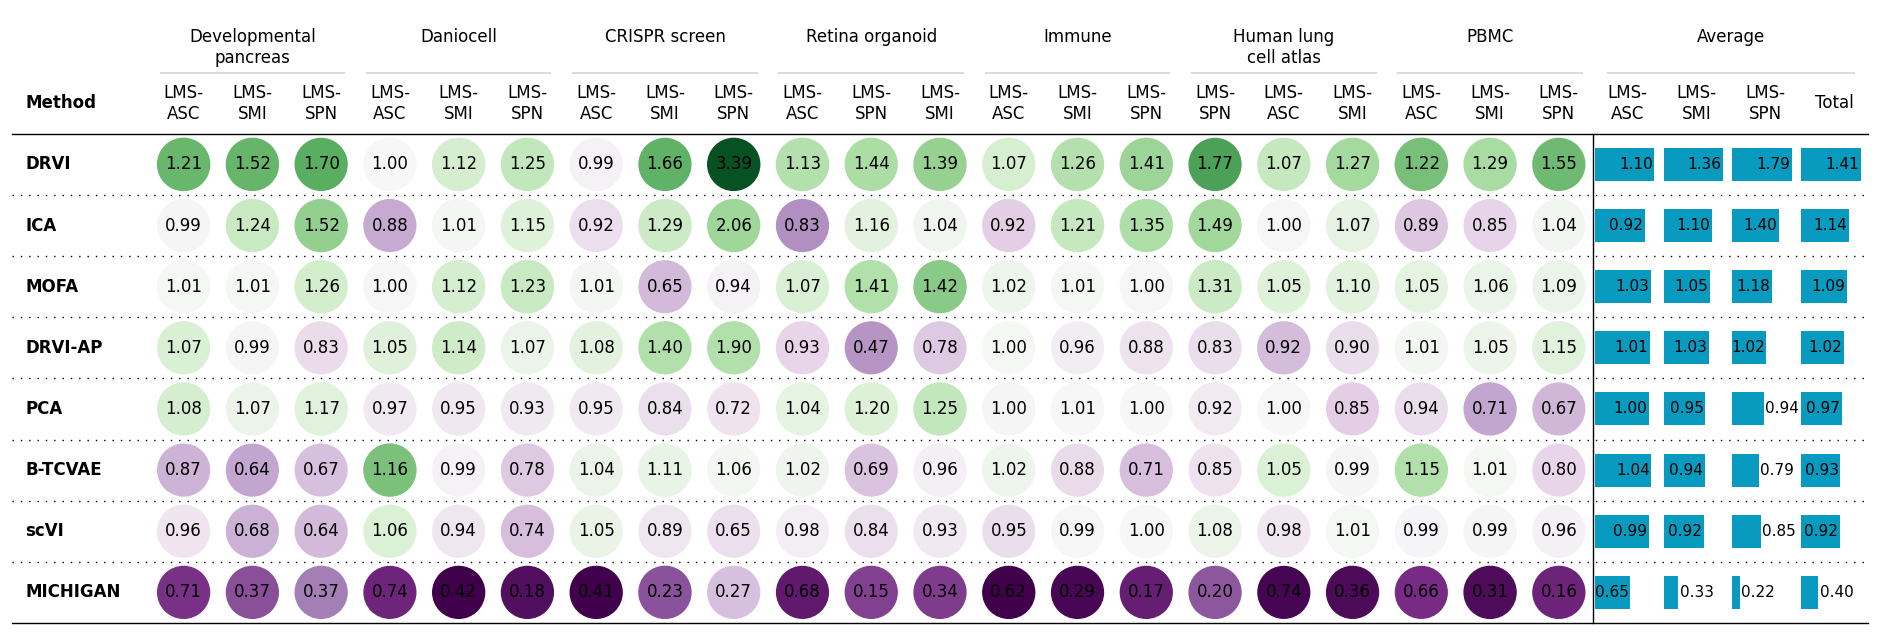

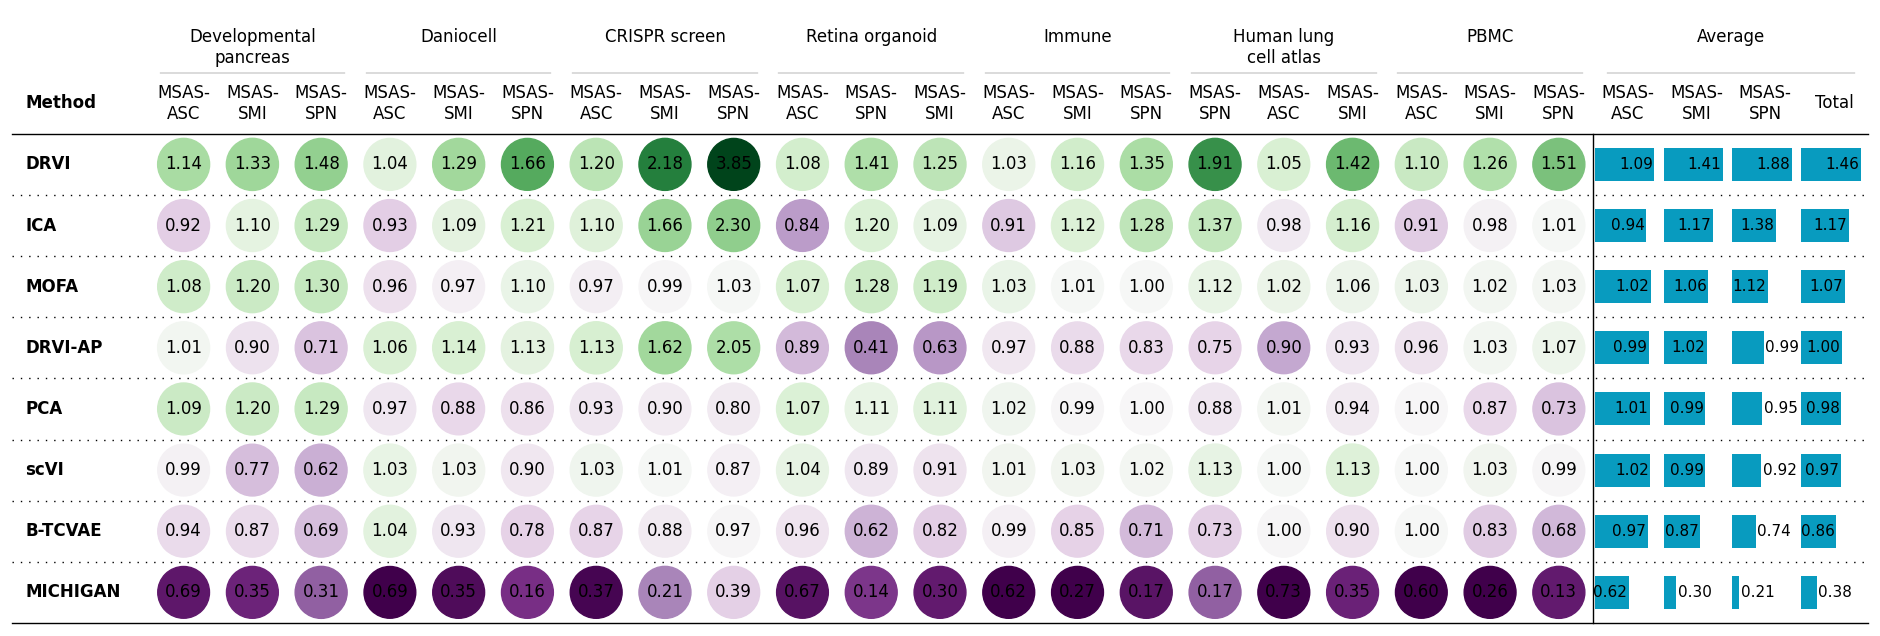

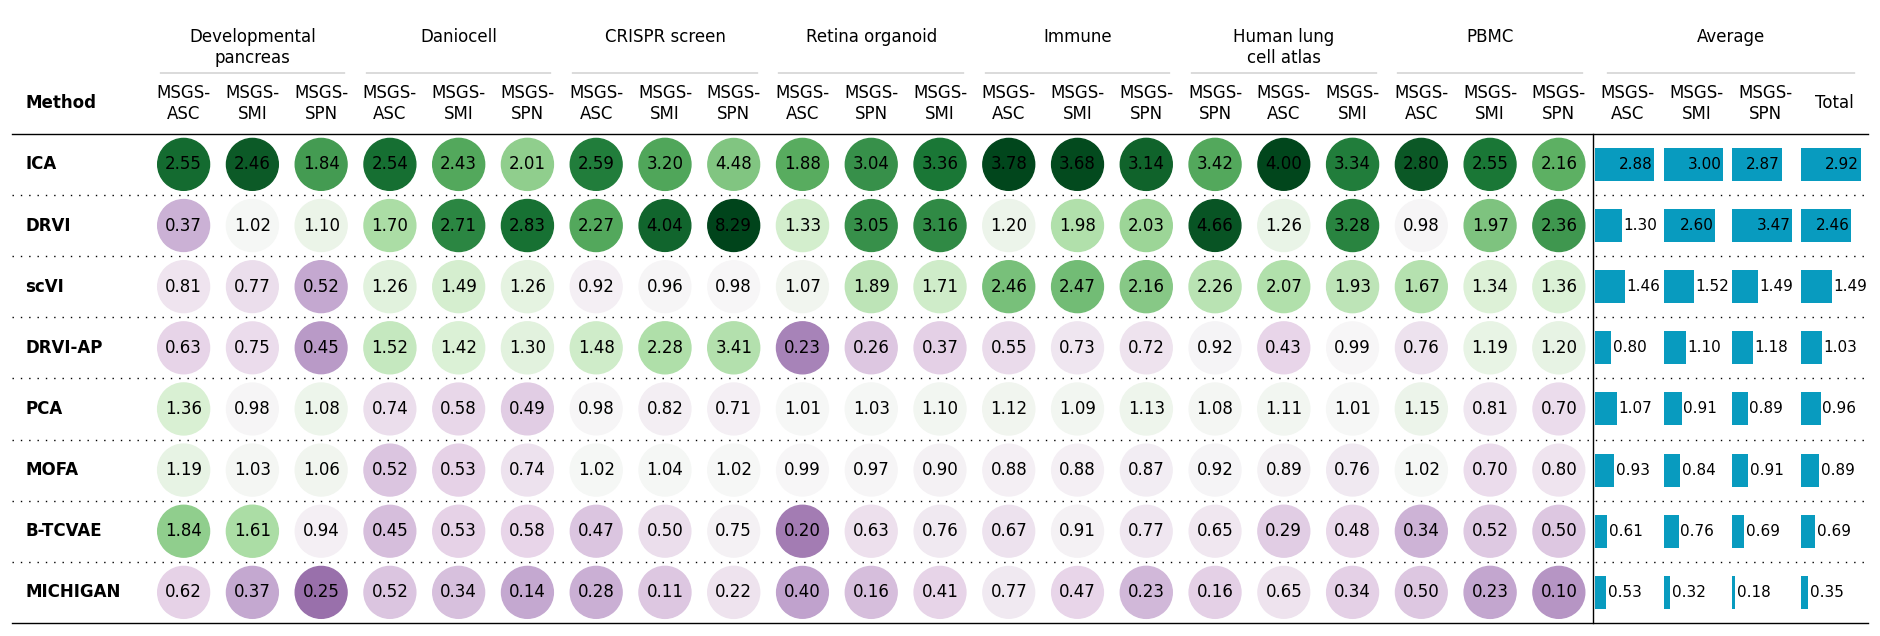

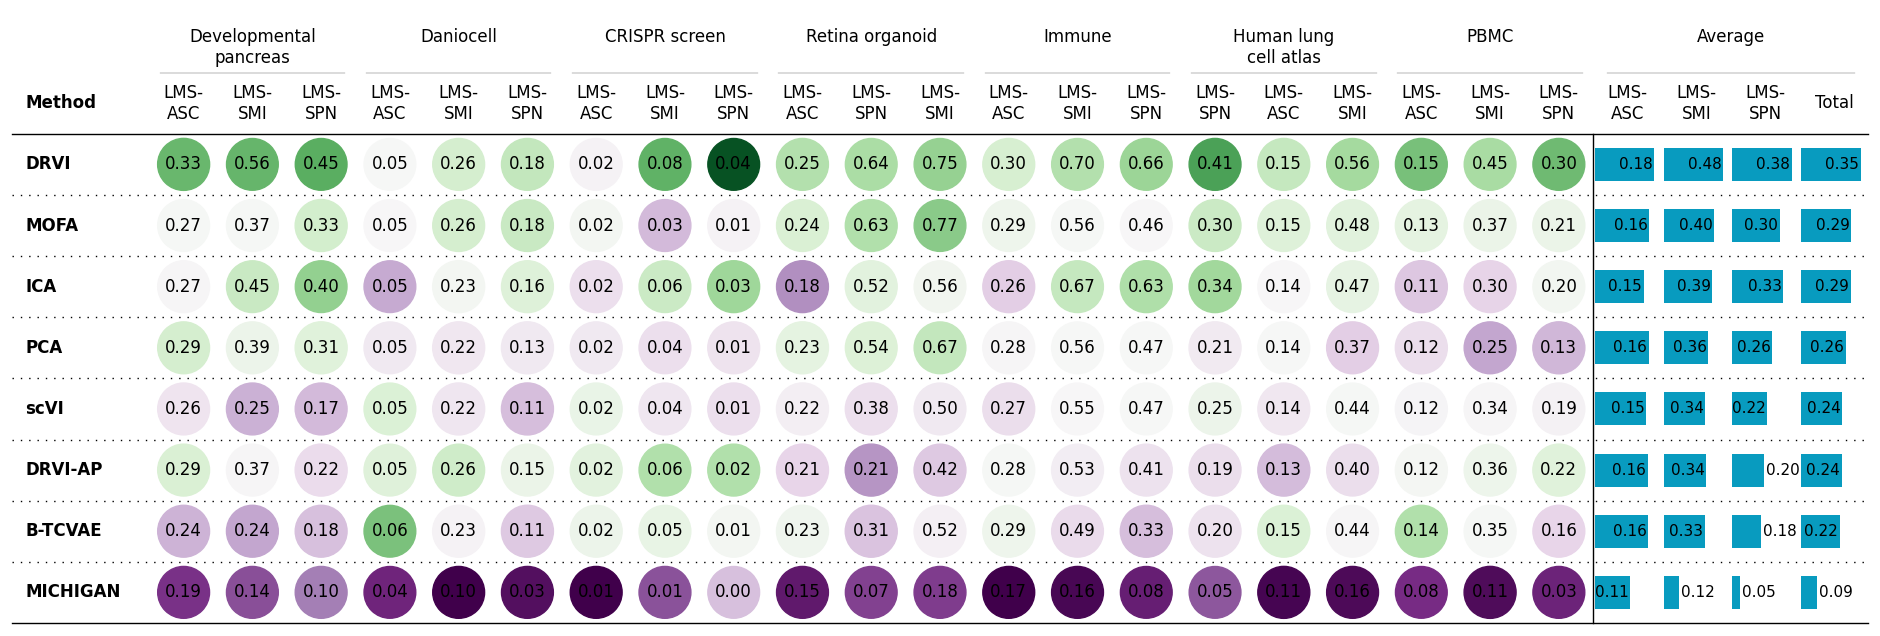

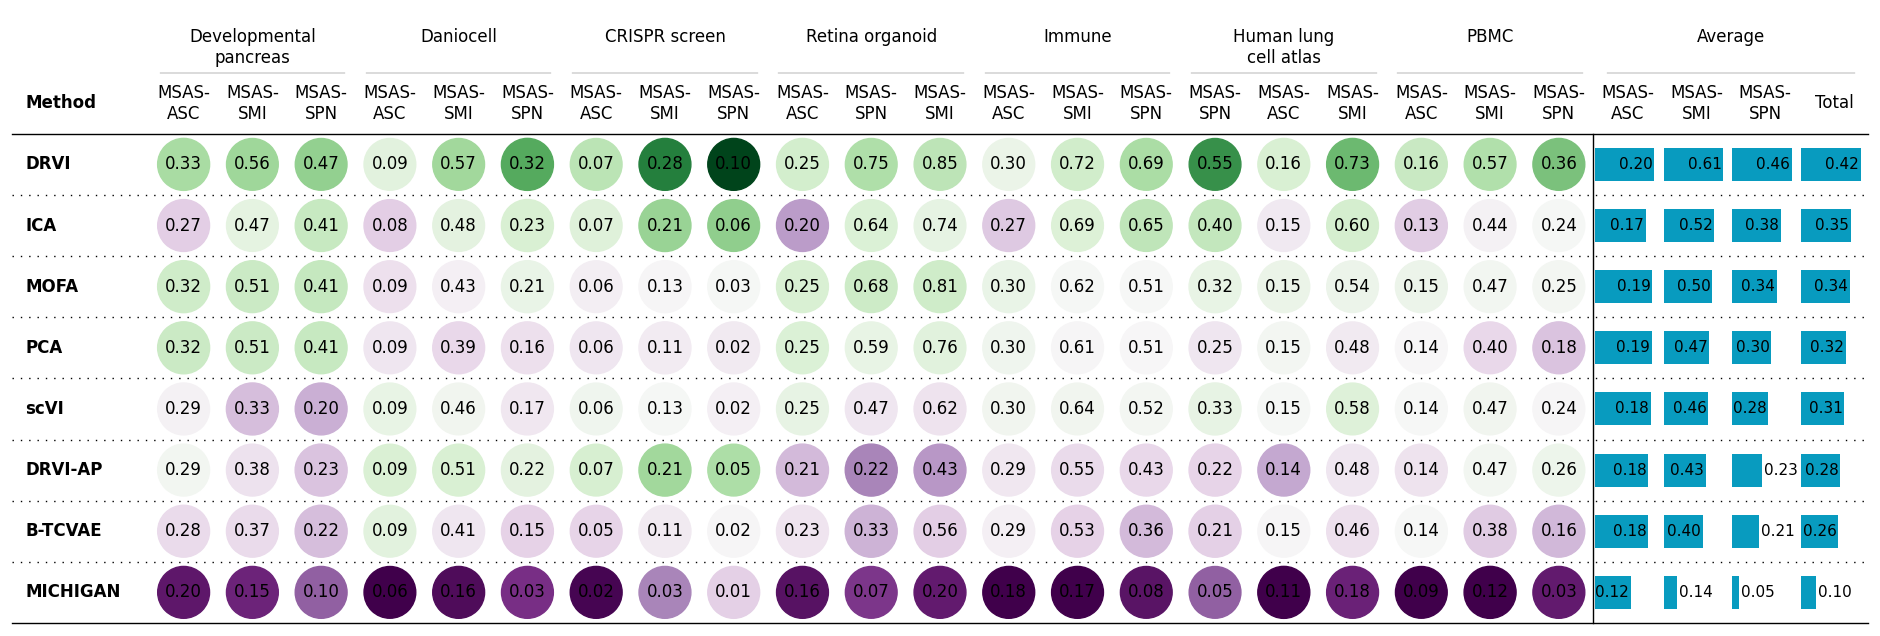

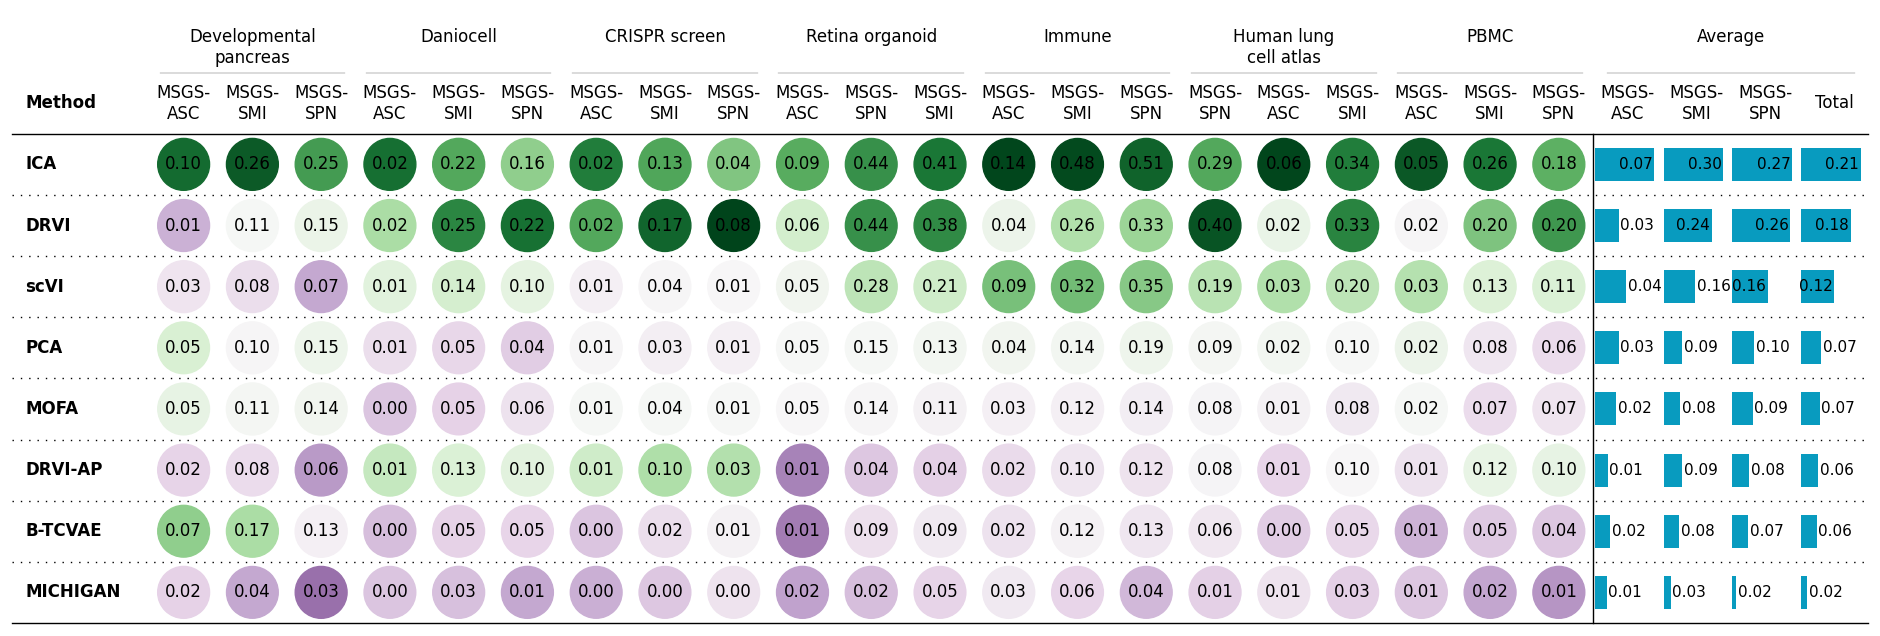

In [19]:
for normalize_each_metric in [True, False]:
    for metric_type in ['LMS', 'MSAS', 'MSGS']:
        plot_df = results_df.query(f'metric_type == "{metric_type}"').copy()
        plot_df = plot_df[plot_df['method'].isin(method_palette.keys())]
        plot_df = plot_df.pivot(
            index=['dataset', 'metric_short_name_complete'], 
            columns='method', 
            values='value'
        ).reset_index()
        plot_df['dataset'] = pd.Categorical(plot_df['dataset'], col_order)
        plot_df=plot_df.sort_values('dataset').assign(
            unique_col=lambda df: df['dataset'].astype(str) + "#" + df['metric_short_name_complete']
        ).drop(columns=['dataset', 'metric_short_name_complete']).set_index('unique_col').T
        if normalize_each_metric:
            plot_df = plot_df / plot_df.median(axis=0)
        for metric_id in plot_df.columns.str.split("#").str[1].unique():
            plot_df[f'Average\n#{metric_id}'] = plot_df.loc[:, plot_df.columns.str.contains(metric_id)].mean(axis=1)
        plot_df = plot_df.loc[:, [c for c in plot_df.columns if 'Average' not in c] + [c for c in plot_df.columns if 'Average' in c]]
        plot_df['Average\n#Total'] = plot_df.loc[:, plot_df.columns.str.startswith('Average')].mean(axis=1)
        plot_df.sort_values('Average\n#Total', inplace=True, ascending=False)
        
        first_avg_seen = False
        def first_avg(col):
            global first_avg_seen
            if 'Average' in col and not first_avg_seen:
                first_avg_seen = True
                return True
            return False
        
        col_defs = (
            [
                ColumnDefinition(
                    name="method",
                    title="Method",
                    textprops={"ha": "left", "weight": "bold"},
                    width=2.,
                ),
            ]+
            [
                ColumnDefinition(
                    name=col,
                    title=col.split("#")[1].replace("-", "-\n"),
                    group=col.split("#")[0],
                    textprops={
                        "ha": "center",
                        "bbox": {"boxstyle": "circle", "pad": 0.45},
                        # "rotation": 30,
                    },
                    cmap=normed_cmap(plot_df[col], cmap=matplotlib.cm.PRGn, num_stds=2.5),
                    formatter="{:.2f}",
                    width=1.,
                ) if 'Average' not in col else
                ColumnDefinition(
                    name=col,
                    title=col.split("#")[1].replace("-", "-\n"),
                    group=col.split("#")[0],
                    textprops={
                        "ha": "center",
                        # "rotation": 30,
                    },
                    plot_fn=bar,
                    plot_kw={
                        "color": "#089BBF",
                        "xlim": (0, plot_df[col].max()*1.1),
                        "plot_bg_bar": False,
                        "annotate": True,
                        "height": 0.9,
                        "formatter": "{:.2f}",
                    },
                    formatter="{:.2f}",
                    width=1.,
                    border="left" if first_avg(col) else None,
                )
                for col in plot_df.columns
            ]
        )
        fig, ax = plt.subplots(figsize=(24, 8))
        table = Table(
            plot_df,
            column_definitions=col_defs,
            row_dividers=True,
            footer_divider=True,
            ax=ax,
            textprops={"fontsize": 12},
            row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
            col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
            column_border_kw={"linewidth": 1, "linestyle": "-"},
        )
        fig.savefig(proj_dir / 'plots' / f'eval_disentanglement_{metric_type}{"" if normalize_each_metric else "_raw"}_table_summary.pdf', facecolor=ax.get_facecolor(), dpi=300)
        plt.show()